# Project Overview

This project involves the use of a Convolutional Neural Network in order to detect the type of Pore Defect in Medical component images. 

Several different types of defects can occur in the production of Titanium (Ti-6Al-4V) based medical components produced through Additive Manufacturing (3D Printing, or more specifically Laser Powder Bed Fusion). The most prominent and detrimental defects are known as pores. These gaps in the material can introduce structural issues in the final component which can compromise the final implant. Therefore, the detection of these pores is of utmost importance. 

Different types of pores are more impactful than others. The most detrimental are Lack of Fusion pores. These are the most irregular and large. The second most damaging are Keyhole pores. These are slightly more regular in shape, and smaller than LOF pores. Finally, the least damaging are Gas pores. These different pores form due to different conditions going awry in the production of the part. 

This body of work, involved labelling 200 images of each type. This was split into 160 Training and 40 Test images respectively. These images were obtained through use of an Optical Microscope of Sliced Titanium components, while the pores for this dataset were then manually classified into each regime. 

# 1. Import the necessary packages to use in this project

In [38]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import models  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# 2. Lets load our data from the directory
Print to check if it is the correct directory
Windows uses \\ in their dir while MacOS or Linux uses //

We will load 480 images from our dataset, containing 160 images from each class (Gas, Keyhole & Lack of Fusion)

# 3. Create an empty array called 'categories'& Put data into DataFrame (2D array table)
Category names. 
*Arrays must be same length (3 letters)
Now we assign an integer according to the categories assigned

In [39]:
#Every Image within the Data Directory is loaded into a DataFrame, with a number then associated to the Pore Type 
filenames = os.listdir(r'C:\Users\conor\Documents\Python\Masters Python Files\MultiClass CNN\data\\')

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'LOF': 
        categories.append(0)  #The categories are set as labels
    elif category == 'K': 
        categories.append(1)
    elif category == 'G':
        categories.append(2)

#Creating a DF with all file names, and numerical categories associated with each pore type
df = pd.DataFrame({
    'filename': filenames,  
    'category': categories,    
})

df.sample(5)


,filename,category
364,LOF.139.PNG,0
358,LOF.133.PNG,0
54,G.148.PNG,2
233,K.20.PNG,1
347,LOF.123.PNG,0


category
2    160
1    160
0    160
Name: count, dtype: int64

 Total images:  480


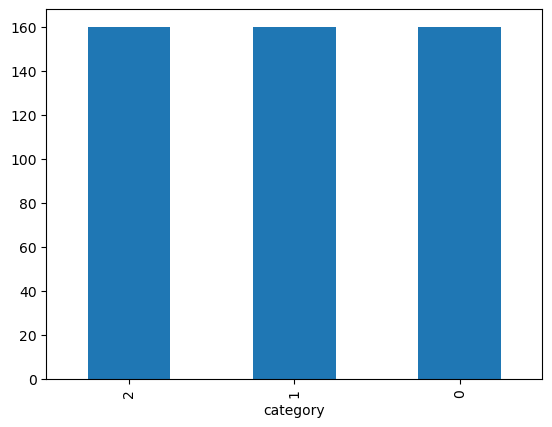

In [40]:
# Lets see total images and in each category

df['category'].value_counts().plot.bar()
print(df['category'].value_counts())

print("\n Total images: ", df.shape[0])

Lets see a sample of our image

LOF.160.PNG


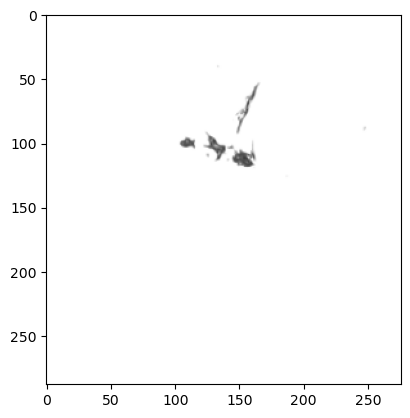

In [41]:
#Choosing a random image from our image dataframe
sample = random.choice(filenames)
print(sample)
#Loading the associated image
image = load_img(r'C:\Users\conor\Documents\Python\Masters Python Files\MultiClass CNN\data\\'+sample)
plt.imshow(image)

# 4. For our image classifier, we will create a Convolutional Neural Network which is best suited for learning images.

Below we instantiate a Sequential model. We then add a series of pooling, Convolutional and Dropout layers to the model 

Final Dense layer is 3 because we have 3 classes (Lack of Fusion, Keyhole and Gas) to classify. 

In [42]:
#Instantiating the model
model2 = Sequential()

#Here we add a 2D Convolutional Layer to the model. This has 32 3 by 3 filters, that slide along the array, computing dot products as they go to detect features. 
#The ReLU (Rectified Linear Unit) Activation Function is then applied to the produced Feature Map from the Filters. 
#As this is a 2D layer these filters will be applied to each channel of the input Tensor. 
#The expected input shape is a 150x150 RGB input. 
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))

#Here we add a Pooling layer. What this does is slide a 2 by 2 grid along the output of the previous layer. At each stage, it retains only the largest
#value in the grid. This downsamples the output of the previous layer. Removes a bit of clutter really.
model2.add(MaxPooling2D(pool_size=(2, 2)))

#Here we add a dropout layer. What this does is randomly set a subset of the output of the above pooling layer (0.25) to 0 to prevent overfitting. 
model2.add(Dropout(0.25))

#Here we do the same thing again, but use 64 Filters, golly. 
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#Here we add a flattening layer, which essntially converts the output tensor of the previous layer into a 1D array of values. This enables Convolutional
#Layers to connect to Fully Connected layers
model2.add(Flatten())

#We now add a fully connected layer, with 96 Neurons. Each neuron in a Fully Connected Layer is connected to every neuron in the preceding layer in contrast
#to convolutional layers. 
model2.add(Dense(96, activation='relu'))
#Adding another Dropout Layer 
model2.add(Dropout(0.5))

#Adding a final FC layer, this time with 3 Neurons, each with a softmax activation function. The values in each of these Neurons will correspond to the
#probabilities of the samples belonging to the three classes Gas, Keyhole and Lack of Fusion
model2.add(Dense(3, activation='softmax')) # 3 classes

#This is where we decide how our model will learn. We set the loss function to categorical_crossentropy. This is a common one for multi-class classification
# as it penalizes misclassifications. The optimizer we use to optimise the models weights is the Adam function, and our barometer for accuracy here, 
#shockingly, is accuracy (i.e. proportion of guesses that were correct guesses by the model)
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#Adding a summary of our pretty little network 
model2.summary()


C:\Users\conor\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 96)                  │       7,962,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,982,403 (30.45 MB)

 Trainable params: 7,982,403 (30.45 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Get callback for early stopping
Use ReduceLR to reduce learning rate when metric not improving

In [43]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Here we create an Early Stopping object, which stops the learning after 10 epochs if there is no improvement in Validation Loss
earlystop = EarlyStopping(patience=10)

#Here we create anothe callback object. This object reduces the learning after 5 epochs, if we do not see a reduction in validation loss by 0.5. 
#It also sets a lower bound of 1E10-5, with verbosity of 1 meaning printing progress on a per epoch basis
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001) 

callbacks = [earlystop, learning_rate_reduction]

In [44]:
#Updating our classes because what the heck 
df["category"] = df["category"].replace({ 0: 'Lack of Fusion', 1: 'Keyhole', 2: 'Gas' })

In [45]:
df["category"].head()

0    Gas
1    Gas
2    Gas
3    Gas
4    Gas
Name: category, dtype: object

# 6. Lets split our files into 80% train and 20% validation. This is common practice in CNN.
Set state=0 to prevent random splitting

category
Gas               131
Keyhole           127
Lack of Fusion    126
Name: count, dtype: int64

 Total train images:  384


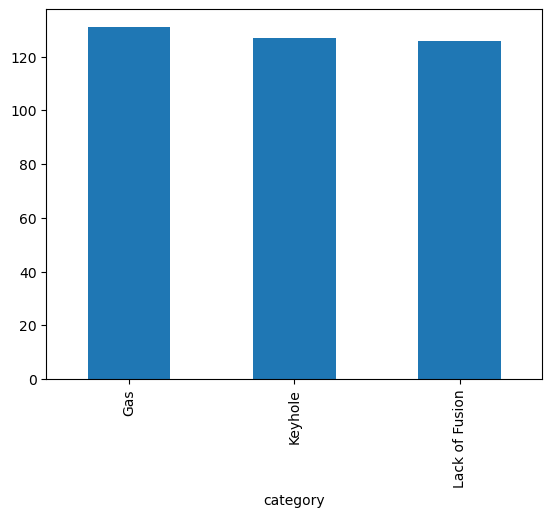

In [46]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) 

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()
print(train_df['category'].value_counts()) # These values sum up to 480*0.8 FYI
print("\n Total train images: ", train_df.shape[0])

category
Lack of Fusion    34
Keyhole           33
Gas               29
Name: count, dtype: int64

 Total validate images:  96


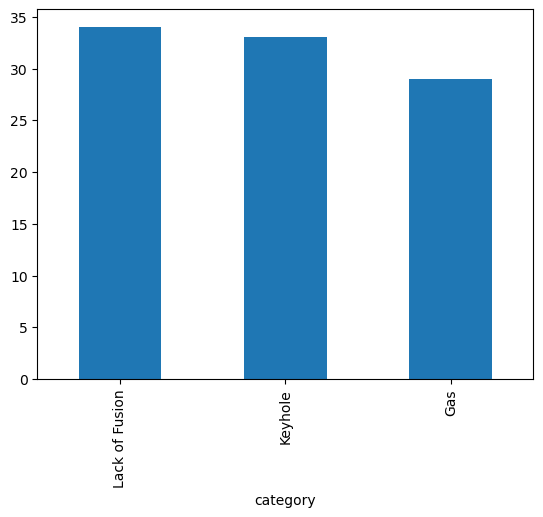

In [47]:
# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
validate_df['category'].value_counts().plot.bar()

print(validate_df['category'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [48]:
# Get total train and validate, and batch size to fit model

total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 384
Total validate images: 96


# 7. Using Data augmentation will help us to artificially increase our dataset.
You can refer to the link here to understand more about the features of data augmentation - 
https://mc.ai/image-data-augmentation-image-processing-in-tensorflow-part-2/ . Here we are stretching our dollar. Making more of what we have. By twisting, pulling, and causing havoc with our nice images here, we essentially create new data. While it seems like much ado about nothing to us, to our model it is brand new data. 

In [49]:
#Here we set up 2 instances of the same ImageDataenerator class, for the training data and validation data where we apply some image transformation 
#techniques
train_datagen = ImageDataGenerator(
                                    rotation_range=15,
                                    rescale=1./255,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale=1./255)

#Here we create two image generators using the flow_from_dataframe method of the above class. This provides batches of the augmented images, on-the-fly
#from our below directory in batches of 32
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    r"C:\Users\conor\Documents\Python\Masters Python Files\MultiClass CNN\data", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\conor\Documents\Python\Masters Python Files\MultiClass CNN\data", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

Found 384 validated image filenames belonging to 3 classes.
Found 96 validated image filenames belonging to 3 classes.


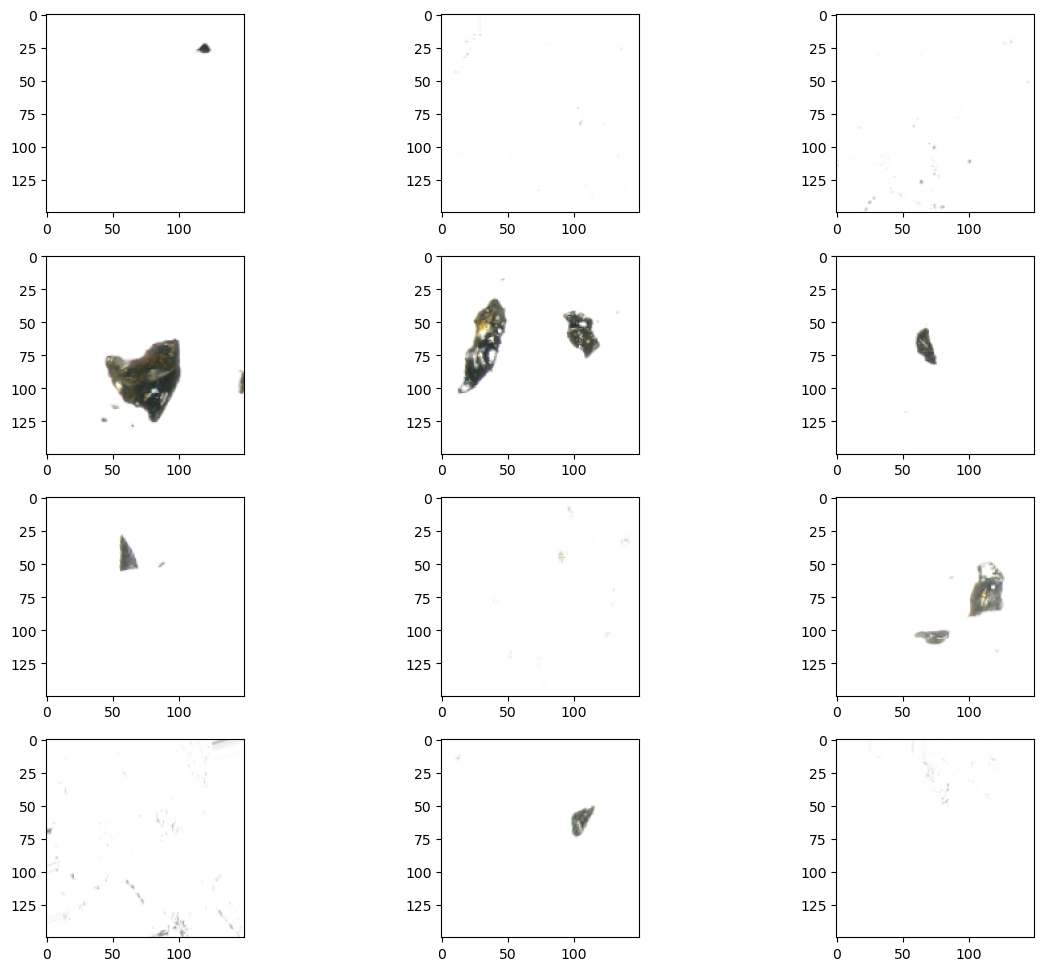

In [50]:
# Lets take a look at how augmented images from train generator look like
#Thye don't acc look different because they're just pores lol 
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 8. Train the model

In [66]:
epochs=50
batch_size=50
#The moment of truth. Applying our sequential CNN model we delicately assembled previously, with callbacks we also prepared earlier in case of any drama  
history = model2.fit(
    x = train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=int(total_validate/batch_size),
    steps_per_epoch=int(total_train/batch_size),
    #callbacks=callbacks
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 598ms/step - accuracy: 0.5584 - loss: 0.9004 - val_accuracy: 0.7188 - val_loss: 0.9024
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.5964 - loss: 0.8016 - val_accuracy: 0.5625 - val_loss: 0.8335
Epoch 3/50


C:\Users\conor\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 490ms/step - accuracy: 0.6679 - loss: 0.8127 - val_accuracy: 0.6875 - val_loss: 0.7557
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.6481 - loss: 0.6840 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 535ms/step - accuracy: 0.6675 - loss: 0.6818 - val_accuracy: 0.6875 - val_loss: 0.6530
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.7056 - loss: 0.6837 - val_accuracy: 0.7812 - val_loss: 0.6143
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 490ms/step - accuracy: 0.7179 - loss: 0.6909 - val_accuracy: 0.6562 - val_loss: 0.6625
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.6945 - loss: 0.6159 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 557ms/step - accuracy: 0.6973 - loss: 0.6526 - val_accuracy: 0.7500 - val_loss: 0.6365
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.6999 - loss: 0.6384 - val_accuracy: 0.7188 - val

# 9. Plot graph for train/val loss & train/val acc
Usually, low train & val loss + high acc * val acc = well predicted model.
Overfitting occurs if validation loss is higher than training loss.
Spikes are caused by a few reasons - insufficient data/learning rate value. In this case I would say that it is caused by insufficient data. We don't really have a lot of images because they're a massive pain to physically obtain.

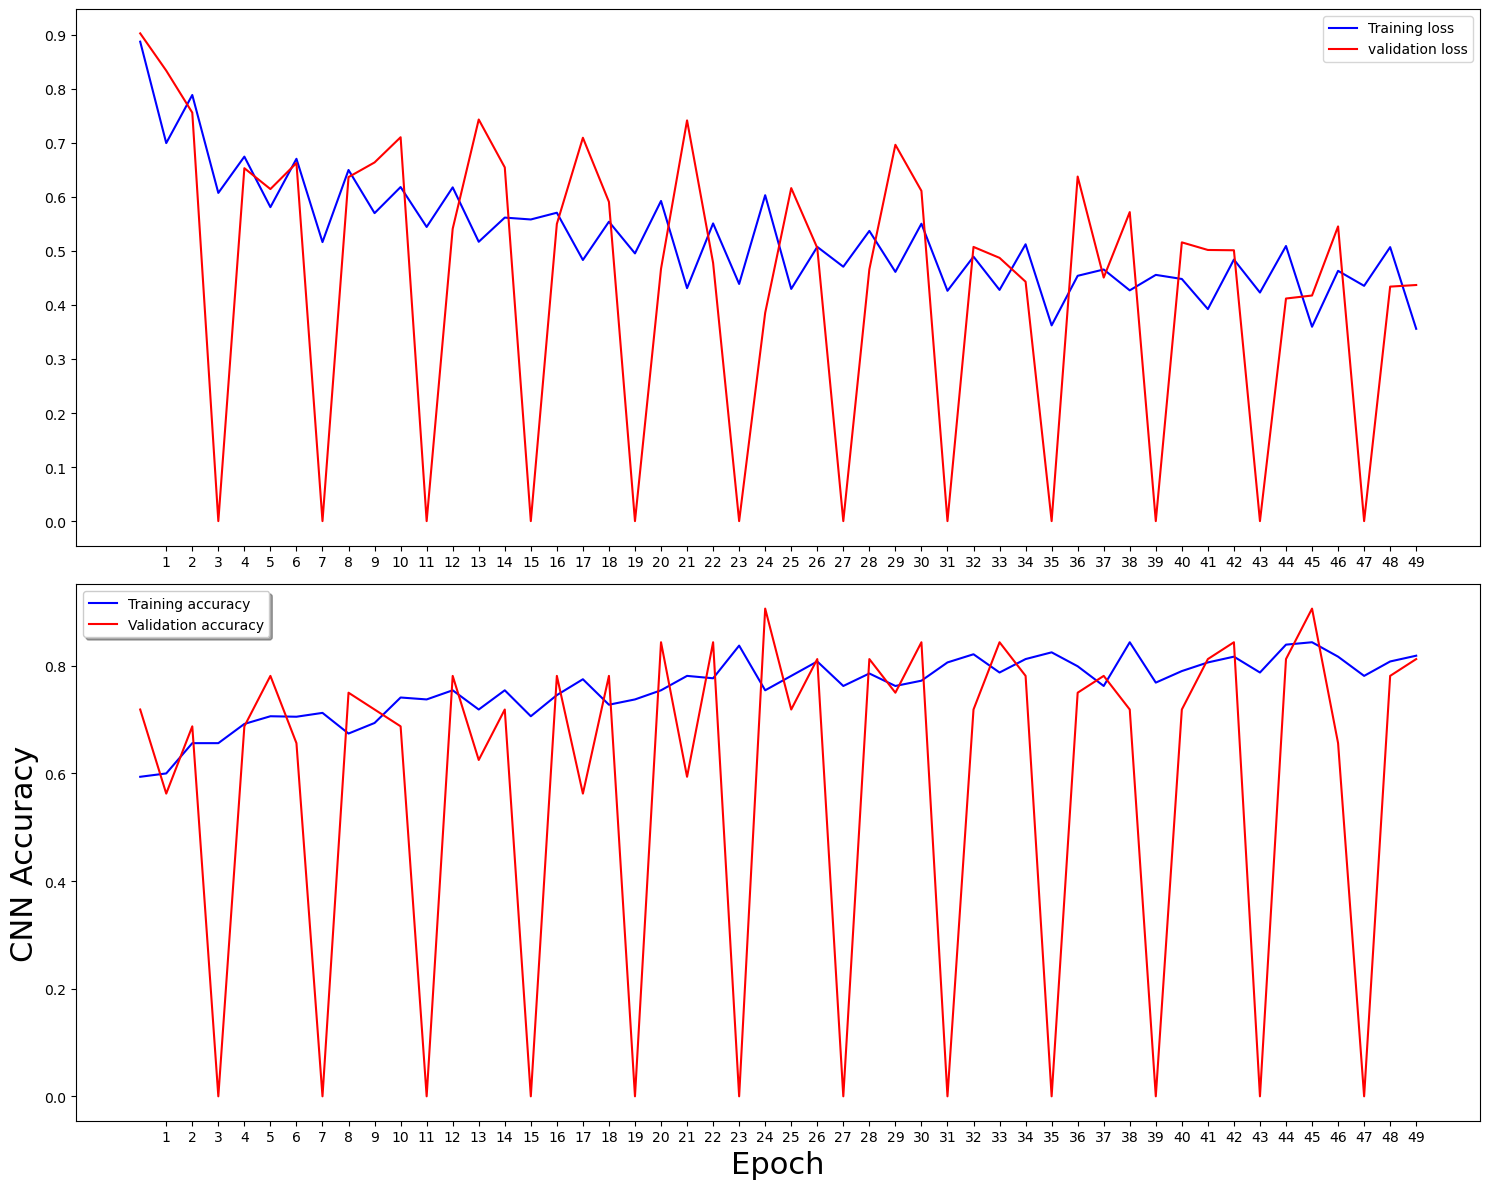

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_xlabel('Epoch', fontsize = 22)
ax2.set_ylabel('CNN Accuracy', fontsize = 22)
ax2.legend()
plt.gcf().set_size_inches(15, 12)
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# 10. Save the trained model to re-use without having to re-train

# 11. Load saved model

 I saved the model as 'poretype.hdf5'. This will save the model to the current working directory. 

In [68]:
model2.save('poretype2.keras')

model = models.load_model('poretype2.hdf5', compile = False)

# 12. Prepare test data
I specified a different folder to predict on different images of pores.
I have 120 images in my test data, which contain 40 images for each class of pore. 

In [69]:
test_filenames = os.listdir(r"C:\Users\conor\Documents\Python\Masters Python Files\MultiClass CNN\test")
test_df = pd.DataFrame({
    'filename': test_filenames
})

Check total images in test folder

In [70]:
total_test = test_df.shape[0]  
print("Total amount of test images are:", total_test)

Total amount of test images are: 120


# 13. Create test generator
Batch_size is 15 to run through batches for large dataset  

In [71]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 15
#Creating another generator
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    r"C:\Users\conor\Documents\Python\Masters Python Files\MultiClass CNN\test",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False 
)

Found 120 validated image filenames.


# 14. Prediction of test data

Preidcting the class of our Test Data. 

In [72]:
predict = model.predict(test_generator, steps=int(np.ceil(total_test/batch_size)))

# Get total predicteed images       
print("Number of predicted images:", len(predict), "\n")

# Get predictions in array. These represent the probabilities that the test images belong to each class 
print("    0:LOF          1:K       2:Gas \n\n", predict, "\n")   

1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step

C:\Users\conor\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Number of predicted images: 120 

    0:LOF          1:K       2:Gas 

 [[6.87587917e-01 2.98335522e-01 1.40764965e-02]
 [1.08030967e-01 6.87312305e-01 2.04656795e-01]
 [4.77692306e-01 4.97199923e-01 2.51077581e-02]
 [5.77917814e-01 3.97464961e-01 2.46172789e-02]
 [4.06143397e-01 5.44507265e-01 4.93492857e-02]
 [6.84519112e-01 3.01819265e-01 1.36615615e-02]
 [4.18368101e-01 5.42430043e-01 3.92019004e-02]
 [1.83402181e-01 6.45774662e-01 1.70823097e-01]
 [1.95017740e-01 6.56495571e-01 1.48486644e-01]
 [4.96130496e-01 4.71226066e-01 3.26434039e-02]
 [7.32354403e-01 2.56590784e-01 1.10547887e-02]
 [3.30109328e-01 6.15300179e-01 5.45904785e-02]
 [2.22772628e-01 6.57136142e-01 1.20091289e-01]
 [7.43106902e-01 2.47182623e-01 9.71050374e-03]
 [3.06149244e-01 6.33775532e-01 6.00752495e-02]
 [2.95273930e-01 6.26924753e-01 7.78013468e-02]
 [6.75516248e-01 3.09696645e-01 1.47871738e-02]
 [4.79361683e-01 4.84955668e-01 3.56827080e-02]
 [7.17148423e-01 2.7115973

# 15. Use np.argmax to get max value from array as predicted answer

In [73]:
test_df['category'] = np.argmax(predict, axis=-1) 

#The prob with the largest value is what we'll call the predicted class

print(test_df['category'][0:3]) 

0    0
1    1
2    1
Name: category, dtype: int64


# 16. Use train class indices for mapping

In [74]:
print(train_generator.class_indices) 
print(validation_generator.class_indices, "\n")

# Map labels to predictions
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
print(label_map, "\n")

# See the output of mapped labels
print(test_df['category'][0:4], "\n")


{'Gas': 0, 'Keyhole': 1, 'Lack of Fusion': 2}
{'Gas': 0, 'Keyhole': 1, 'Lack of Fusion': 2} 

{0: 'Gas', 1: 'Keyhole', 2: 'Lack of Fusion'} 

0        Gas
1    Keyhole
2    Keyhole
3        Gas
Name: category, dtype: object 



# 17. View the amount of predicted image in category assigned 
 

category
Keyhole           58
Lack of Fusion    44
Gas               18
Name: count, dtype: int64

Total predicted images: 120


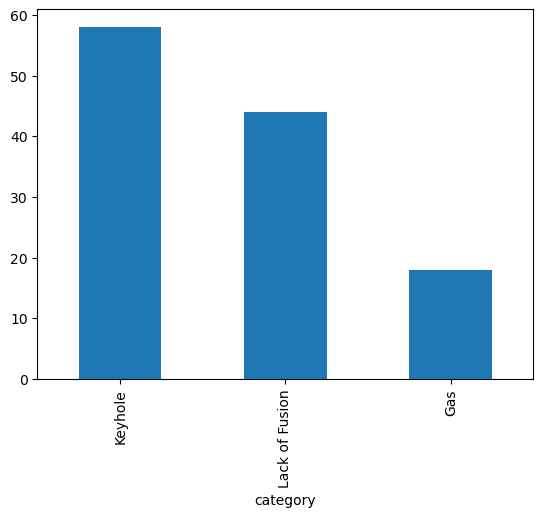

In [75]:
test_df['category'].value_counts()
print(test_df['category'].value_counts())

# View the above in a bar graph
test_df['category'].value_counts().plot.bar()

# Lets print the total predicted images 
print("\nTotal predicted images:", test_df.shape[0])

# 18. View predicted result with images

Some of our images are wrongly predicted, we could probably improve our accuracy here by fiddling with the network parameters.

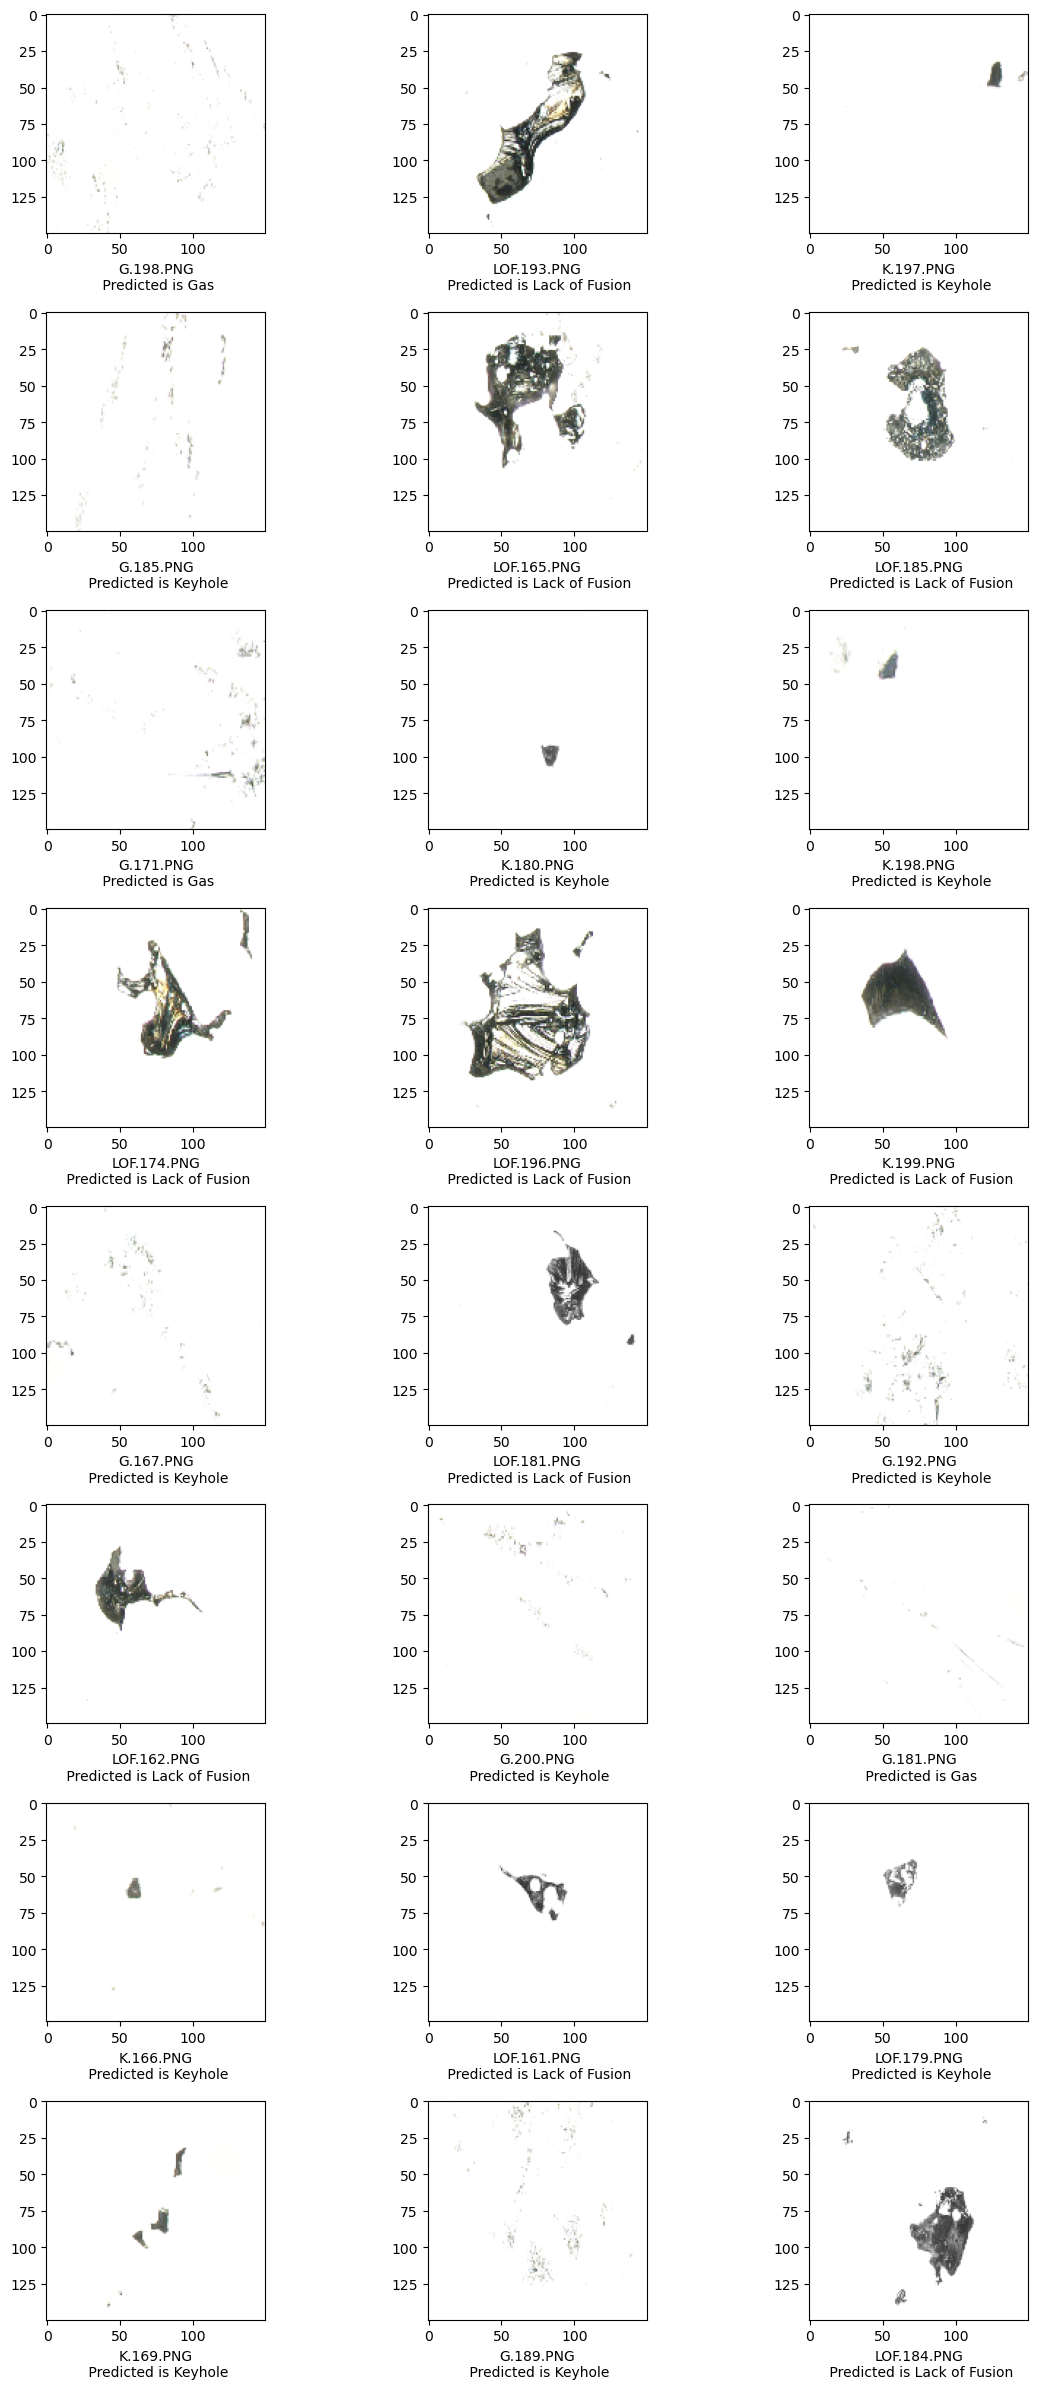

In [82]:
test = test_df.sample(24)
test = test.reset_index()
plt.figure(figsize=(12, 24))
for index, row in test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\conor\Documents\Python\Masters Python Files\MultiClass CNN\test\\"+filename, target_size=(150,150)) #rescale(1./255)
    plt.subplot(8, 3, index+1)      
    plt.imshow(img)
    plt.xlabel(filename + "\n Predicted is " + "{}".format(category))
plt.tight_layout()
plt.show()

# 19. Lastly, Create a confusion Matrix for the Results 

In [83]:
predictions = list(test_df['category'])
truth_values = [i.split('.')[0] for i in list(test_df['filename'])]
for i in range(len(truth_values)): 
    if truth_values[i] == 'G':
        truth_values[i] == 'Gas'
    elif truth_values[i] == 'K':
        truth_values[i] == 'Keyhole'
    else:
        truth_values[i] == 'Lack of Fusion'

In [84]:
truth_values=list(map(lambda x: x.replace('G','Gas'),truth_values))
truth_values=list(map(lambda x: x.replace('LOF','Lack of Fusion'),truth_values))
truth_values=list(map(lambda x: x.replace('K','Keyhole'),truth_values))

In [85]:
from sklearn.metrics import confusion_matrix

# Get the unique labels (classes) from both lists
labels = sorted(set(predictions + truth_values))

# Create the confusion matrix
conf_matrix = confusion_matrix(truth_values, predictions, labels=labels)

print(conf_matrix)

[[17 23  0]
 [ 1 33  6]
 [ 0  2 38]]


We can see from the above, in the Test Set the greatest error was in the Gas type pores. These pores were often misclassified as Keyhole pores (more often than not in fact). Lack of Fusion pores were the identified correctly most often.  

In [86]:
print(f'Lack of Fusion pores had the highest Recall of {conf_matrix[2][2]/sum(conf_matrix[2][:])}')
print(f'while Keyhole pores had a Recall of {conf_matrix[1][1]/sum(conf_matrix[1][:])}')
print(f'and finally Gas pores had the highest Recall of {conf_matrix[0][0]/sum(conf_matrix[0][:])}')

Lack of Fusion pores had the highest Recall of 0.95
while Keyhole pores had a Recall of 0.825
and finally Gas pores had the highest Recall of 0.425


This result makes sense intuitevly really when you look at the pores. The LOF pores are intimidating looking large gashes in the material, generally having defined features such as high contrast edges for the model to pick out. Same with Keyhole, although not as much as LOF. The irregular geometry of keyhole pores also lends itself to classification here. The issues with the Gas pores here is what derailed the model accuracy, as well as lack of data. These pores were too small to detect visually with the Optical Microscope, hence leading to poor images. Perhaps an XCT Scan would pick them up better. 